<h1> InputDataSet Class and sktime example </h1>
First we import packages.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sktime.classification.deep_learning.cnn import CNNClassifier
from sktime.classification.deep_learning.resnet import ResNetClassifier
from sktime.classification.deep_learning import InceptionTimeClassifier
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.hybrid import HIVECOTEV2


from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import sys
sys.path.append('..')
# from slp_package.slp_functions import create_merged_game_data_df
from slp_package.input_dataset import InputDataSet

2024-04-09 17:05:30.143519: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 17:05:30.165906: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9373] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 17:05:30.165926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 17:05:30.166553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1534] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-09 17:05:30.170306: I tensorflow/core/platform/cpu_feature_guar

<h2> Define Features </h2>
Here we define the parameters for the InputDataSet object we will create. It includes the source of the data we want and a list of features we will restrict ourselves to.

In [2]:
# We classify 5 characters on competitive stages

source_data = ['ranked']

general_features = {
    'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
    'num_players': [2],
    'conclusive': [True]
}
player_features = {
    # 'netplay_code': ['MANG#0'],
    'character_name': ['FOX', 'FALCO', 'MARTH', 'CAPTAIN_FALCON', 'SHEIK'],
    'type_name': ['HUMAN']
    
}
opposing_player_features = {
    # 'character_name': ['MARTH'],
    # 'netplay_code': ['KOD#0', 'ZAIN#0']
    'type_name': ['HUMAN']
}
label_info = {
    'source': ['player'], # Can be 'general', 'player
    # 'feature': ['netplay_code']
    'feature': ['character_name']
}
    

In [3]:
# # We classify 5 characters on competitive stages

# source_data = ['ranked']

# general_features = {
#     'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
#     'num_players': [2],
#     'conclusive': [True]
# }
# player_features = {
#     # 'netplay_code': ['MANG#0'],
#     'character_name': ['FOX'],
#     'type_name': ['HUMAN']
    
# }
# opposing_player_features = {
#     'character_name': ['FOX', 'FALCO', 'MARTH', 'CAPTAIN_FALCON', 'SHEIK'],
#     # 'netplay_code': ['KOD#0', 'ZAIN#0'],
#     'type_name': ['HUMAN']
# }
# label_info = {
#     'source': ['opposing_player'], # Can be 'general', 'player', 'opposing_player'
#     # 'feature': ['netplay_code']
#     'feature': ['character_name']
# }
    

In [4]:
# # We classify 5 characters on competitive stages

# source_data = ['ranked']

# general_features = {
#     'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM'],
#     'num_players': [2],
#     'conclusive': [True]
# }
# player_features = {
#     # 'netplay_code': ['MANG#0'],
#     'character_name': ['FOX'],
#     'type_name': ['HUMAN']
    
# }
# opposing_player_features = {
#     'character_name': ['FOX', 'JIGGLYPUFF'],
#     # 'netplay_code': ['KOD#0', 'ZAIN#0'],
#     'type_name': ['HUMAN']
# }
# label_info = {
#     'source': ['opposing_player'], # Can be 'general', 'player', 'opposing_player'
#     # 'feature': ['netplay_code']
#     'feature': ['character_name']
# }
    

In [5]:
# # We classify 5 characters on competitive stages

# source_data = ['mango']

# general_features = {
#     'stage_name': ['FOUNTAIN_OF_DREAMS','FINAL_DESTINATION','BATTLEFIELD','YOSHIS_STORY','POKEMON_STADIUM','DREAMLAND'],
#     'num_players': [2],
#     'conclusive': [True]
# }
# player_features = {
#     'netplay_code': ['MANG#0'],
#     'character_name': ['FALCO'],
#     'type_name': ['HUMAN']
    
# }
# opposing_player_features = {
#     'character_name': ['FOX', 'MARTH'],
#     # 'netplay_code': ['KOD#0', 'ZAIN#0'],
#     'type_name': ['HUMAN']
# }
# label_info = {
#     'source': ['opposing_player'], # Can be 'general', 'player', 'opposing_player'
#     # 'feature': ['netplay_code']
#     'feature': ['character_name']
# }

<h2> Create Dataset Object </h2>
We create the dataset object and check the number of games for each label in our data and print the first several rows of the dataset to make sure it looks correct.

In [6]:
dataset = InputDataSet(source_data, general_features, player_features, opposing_player_features, label_info)

print(dataset.dataset['labels'].value_counts())
dataset.dataset.head()

FOX               47540
FALCO             42091
MARTH             24412
SHEIK             15842
CAPTAIN_FALCON    15483
Name: labels, dtype: int64


/workspace/slp_jaspar/sktime_baseline_tests/../slp_package/input_dataset.py:95: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  processed_df = pd.concat([player_1_df, player_2_df], ignore_index=True)


,stage_name,num_players,conclusive,player_character_name,player_type_name,opposing_player_type_name,player_inputs_np_sub_path,length,labels
0,FINAL_DESTINATION,2,True,FOX,HUMAN,HUMAN,ranked\FOX\aeafe866-abff-4192-a4b4-13cb54d2394...,5969,FOX
1,BATTLEFIELD,2,True,CAPTAIN_FALCON,HUMAN,HUMAN,ranked\CAPTAIN_FALCON\8e8096ce-bc14-4c0d-94db-...,6073,CAPTAIN_FALCON
2,FINAL_DESTINATION,2,True,CAPTAIN_FALCON,HUMAN,HUMAN,ranked\CAPTAIN_FALCON\874e8753-12b7-4784-95dc-...,6989,CAPTAIN_FALCON
3,BATTLEFIELD,2,True,SHEIK,HUMAN,HUMAN,ranked\SHEIK\6d28399b-a152-4a05-b407-77cb587d3...,6806,SHEIK
4,FOUNTAIN_OF_DREAMS,2,True,FOX,HUMAN,HUMAN,ranked\FOX\21b778c7-429a-4f0f-9426-b28247c41df...,7102,FOX


<h2> Call number_of_segments_per_game() </h2>
We set the length of the segments and the number of segments per label that we want in the dataset we are going to prepare. In the column 'Count' we see the number of games we have for each label (this is less than the value counts earlier because we discard games that are too short). In the column 'Shift' we see how much each segment will be shifted by. If the shift is less than the length of the segments, the data we prepare will contain overlaping segments.

In [7]:
# dataset.number_of_segments_per_game(10, 50000)
dataset.number_of_segments_per_game(10, 10000)
dataset.number_of_segments_per_game(10, 500)

,Label,Count,Shift
0,FOX,47517,830554
1,FALCO,42080,740412
2,MARTH,24402,461186
3,SHEIK,15840,317560
4,CAPTAIN_FALCON,15475,263149


<h2> Split data and prepare it for the model </h2>

In [8]:
# dataset.number_of_segments_per_game(10, 10000)
X_train, X_test, y_train, y_test  = dataset.train_test_split_numpy(test_ratio = .30,  val = False)

# print()
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

100%|██████████| 43601/43601 [00:00<00:00, 116257.51it/s]


<h2> Train sktime model </h2>
Now that we have prepared our dataset, we train a model with sktime. After we train the model we calculate its score on the test data.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 9)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1018, 6)           384       
                                                                 
 average_pooling1d (Average  (None, 339, 6)            0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 333, 12)           516       
                                                                 
 average_pooling1d_1 (Avera  (None, 111, 12)           0         
 gePooling1D)                                                    
                                                                 
 flatten (Flatten)           (None, 1332)              0     

2024-04-09 17:05:37.145302: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-09 17:05:37.145314: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: fe226a843faa
2024-04-09 17:05:37.145318: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: fe226a843faa
2024-04-09 17:05:37.145364: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.161.7
2024-04-09 17:05:37.145371: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.161.7
2024-04-09 17:05:37.145373: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.161.7


55/55 [==============================] - 1s 4ms/step - loss: 1.7060 - accuracy: 0.2097
Epoch 2/30
55/55 [==============================] - 0s 2ms/step - loss: 1.5251 - accuracy: 0.2903
Epoch 3/30
55/55 [==============================] - 0s 2ms/step - loss: 1.2296 - accuracy: 0.4571
Epoch 4/30
55/55 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.5246
Epoch 5/30
55/55 [==============================] - 0s 2ms/step - loss: 0.9702 - accuracy: 0.5909
Epoch 6/30
55/55 [==============================] - 0s 2ms/step - loss: 0.8885 - accuracy: 0.6200
Epoch 7/30
55/55 [==============================] - 0s 2ms/step - loss: 0.7848 - accuracy: 0.6646
Epoch 8/30
55/55 [==============================] - 0s 2ms/step - loss: 0.7261 - accuracy: 0.7074
Epoch 9/30
55/55 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.7406
Epoch 10/30
55/55 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7897
Epoch 11/30
55/55 [===========

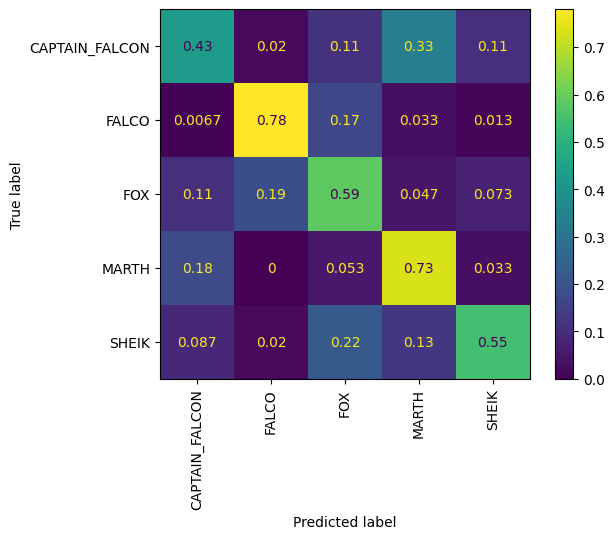

In [9]:
batch_size = 32
epochs = 30

model = CNNClassifier(verbose = 1, n_epochs=epochs, batch_size=batch_size, loss = 'categorical_crossentropy', random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of CNN:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', xticks_rotation='vertical')
plt.show()

tf.compat.v1.reset_default_graph()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1024, 9)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1024, 64)             4672      ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 1024, 64)             256       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 1024, 64)             0         ['batch_normalization[0][0

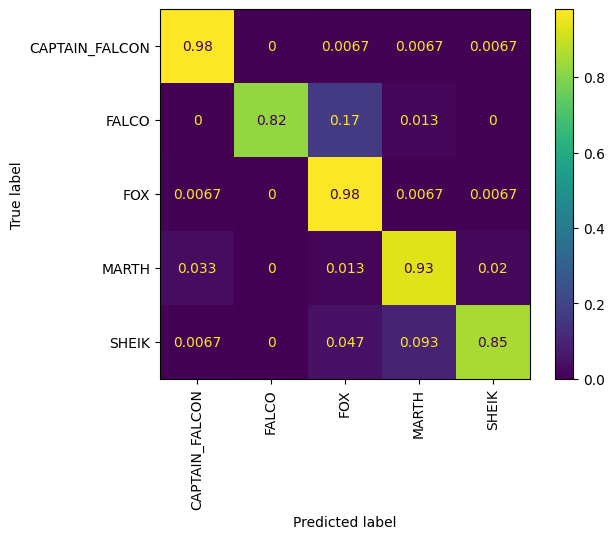

In [10]:
batch_size = 32
epochs = 30

model = ResNetClassifier(verbose = 1, n_epochs=epochs, batch_size=batch_size, loss = 'categorical_crossentropy', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy of ResNet: ', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', xticks_rotation='vertical')
plt.show()
tf.compat.v1.reset_default_graph()

Accuracy of Rocket: 0.9013333333333333


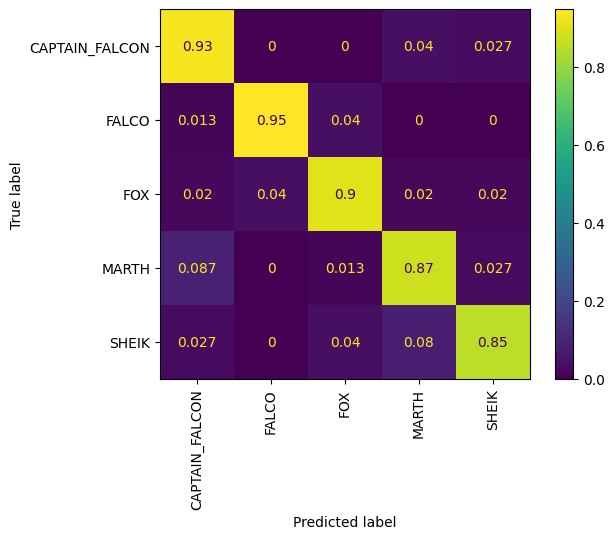

In [11]:
clf = RocketClassifier(num_kernels=1000, n_jobs=-1, random_state=42, rocket_transform = 'minirocket') 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print('Accuracy of Rocket:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true', xticks_rotation='vertical')
plt.show()

In [12]:
hivecotev_model = HIVECOTEV2(n_jobs=-1, random_state=42, verbose=1, time_limit_in_minutes=1) 
hivecotev_model.fit(X_train, y_train) 
print('Done Training') 
y_pred = hivecotev_model.predict(X_test) 
print('Accuracy of Rocket:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true', xticks_rotation='vertical')
plt.show()

STC  17:13:15 09/04/2024
STC train estimate  17:13:20 09/04/2024
STC weight = 0.18134777057783258


/usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/catch22.py:354: FutureWarning: In Catch22._transform_single_feature

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Can't unify return type from the following types: array(float64, 1d, C), readonly array(float32, 1d, C)
Return of: IR name '$34return_value.1', type 'readonly array(float32, 1d, C)', location: 
File "../../../usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/_catch22_numba.py", line 494:
def _normalise_series(X: np.ndarray, mean):
    <source elided>
        return (X - mean) / std
    return X
    ^
Return of: IR name '$30return_value.5', type 'array(float64, 1d, C)', location: 
File "../../../usr/local/lib/python3.10/dist-packages/sktime/transformations/panel/_catch22_numba.py", line 493:
def _normalise_series(X: np.ndarray, mean):
    <source elided>
    if std > 0:
        return (X - mean) / std
        ^

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1024, 9)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 1024, 32)             288       ['input_3[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 1024, 9)              0         ['input_3[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 1024, 32)             40960     ['conv1d[0][0]']          

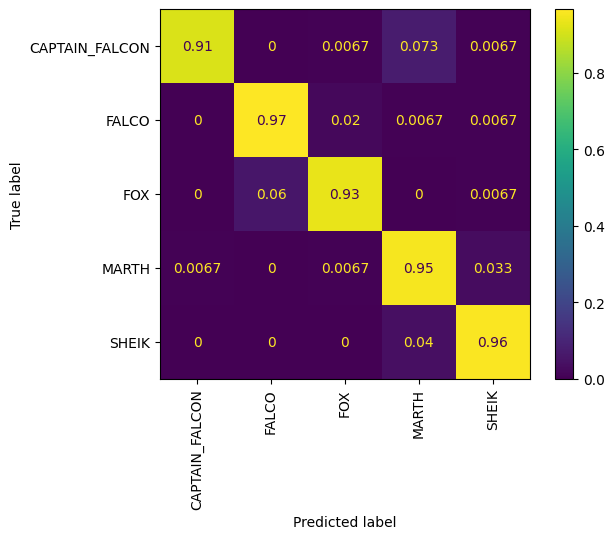

In [13]:
inceptiontime_model = InceptionTimeClassifier(n_epochs=30, random_state=42, verbose=True, loss='categorical_crossentropy') 
inceptiontime_model.fit(X_train, y_train) 
y_pred = inceptiontime_model.predict(X_test) 
print('Accuracy of Inception Time:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', xticks_rotation='vertical')
plt.show()
tf.compat.v1.reset_default_graph()

In [14]:
clf = RocketClassifier(num_kernels=1000, n_jobs=-1, random_state=42, rocket_transform = 'multirocket') 
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print('Accuracy of Rocket:', accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize='true', xticks_rotation='vertical')

TypeError: No matching definition for argument type(s) array(float32, 3d, A), array(float32, 3d, A), Tuple(array(int32, 1d, C), array(int32, 1d, C), array(int32, 1d, C), array(int32, 1d, C), array(float32, 1d, C)), Tuple(array(int32, 1d, C), array(int32, 1d, C), array(int32, 1d, C), array(int32, 1d, C), array(float32, 1d, C)), int64